In [19]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR,SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,silhouette_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kmodes.kprototypes import KPrototypes

In [2]:
df = datasets.load_iris()
x = df.data
y =df.target

In [3]:
le = StandardScaler()
x_scaled = le.fit_transform(x)

In [4]:
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster, random_state=0)
kmeans.fit(x_scaled)


KMeans(n_clusters=3, random_state=0)

In [5]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(centers)
print(labels)

[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


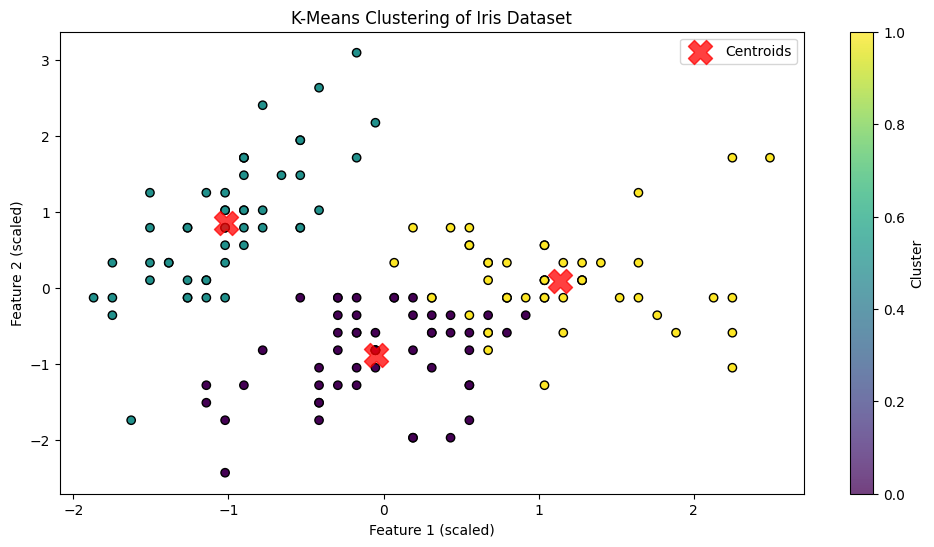

In [6]:
plt.figure(figsize=(12, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

In [7]:
silhouette_avg = silhouette_score(x_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')
print( davies_bouldin_score(x_scaled, labels))

Silhouette Score: 0.46
0.8335949464754338


In [8]:
user_input = np.array([[5.0, 3.5, 1.5, 0.2]]) 
user_input_scaled = le.transform(user_input) 
predicted_cluster = kmeans.predict(user_input_scaled)
print(f'Predicted Cluster for input {user_input[0]}: {predicted_cluster[0]}')

Predicted Cluster for input [5.  3.5 1.5 0.2]: 1


In [9]:
df4 = pd.DataFrame(df.data , columns=df.feature_names)
df4['target'] = df.target
df4['lable']=labels
df4.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,lable
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [10]:
df1 = df4[df4['lable'] == 0]
df2 = df4[df4['lable'] == 1]
df3 = df4[df4['lable'] == 2]

In [11]:
print('cluster1',df1['target'].value_counts())
print('cluster2',df2['target'].unique())
print('cluster3',df3['target'].value_counts())


cluster1 target
1    39
2    14
Name: count, dtype: int64
cluster2 [0]
cluster3 target
2    36
1    11
Name: count, dtype: int64


In [12]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters = dbscan.fit_predict(x_scaled)

In [13]:
if len(set(clusters)) > 1:  
    silhouette_avg = silhouette_score(x_scaled, clusters)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print('Silhouette Score cannot be calculated, only one cluster detected.')

Silhouette Score: 0.40


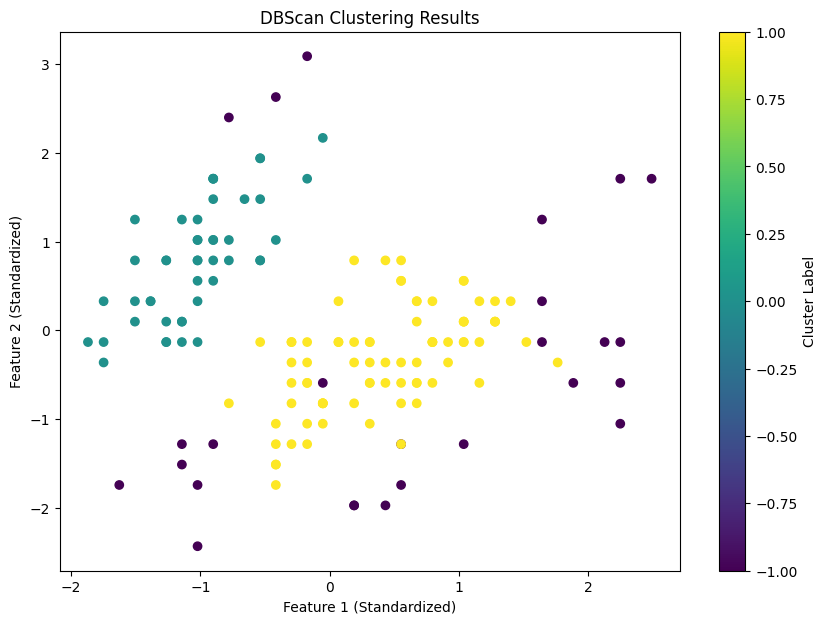

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBScan Clustering Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.colorbar(label='Cluster Label')
plt.show()

In [15]:
user_input = np.array([[5.1, 3.5, 1.4, 0.2]])
user_input_scaled = le.transform(user_input)
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(x_scaled)
distances, indices = neigh.kneighbors(user_input_scaled)
nearest_point_cluster = clusters[indices[0][0]]
print(f'User-defined input belongs to cluster: {nearest_point_cluster}')

User-defined input belongs to cluster: 0


In [16]:
df4 = pd.DataFrame(df.data , columns=df.feature_names)
df4['target'] = df.target
df4['lable']=clusters
df4.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,lable
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [17]:
df1 = df4[df4['lable'] == 0]
df2 = df4[df4['lable'] == 1]
df3 = df4[df4['lable'] == -1]

In [18]:
print('cluster1',df1['target'].value_counts())
print('cluster2',df2['target'].unique())
print('cluster3',df3['target'].value_counts())

cluster1 target
0    46
Name: count, dtype: int64
cluster2 [1 2]
cluster3 target
2    14
1     8
0     4
Name: count, dtype: int64


In [35]:
df = datasets.load_iris()
df1 = pd.DataFrame(data = df.data, columns= df.feature_names)
df1['species'] = df.target
df1['species'] = df1['species'].astype('category')
categorical_index = df1.columns.get_loc('species')


4


In [33]:
n_cluster = 4
kproto = KPrototypes(n_clusters=n_cluster,init='huang',verbose=0)
cluster = kproto.fit_predict(df1,categorical=[categorical_index])
print(kproto.cluster_centroids_)

[[7.34       3.14666667 6.19333333 2.11333333 2.        ]
 [5.78809524 2.71666667 4.14047619 1.28571429 1.        ]
 [6.34883721 2.92790698 5.20465116 1.90465116 2.        ]
 [5.006      3.428      1.462      0.246      0.        ]]


In [34]:
silhouette_avg = silhouette_score(df1,clusters)
print(silhouette_avg)

0.42318663852551536
